# 📊 Mini-Projet IA : Prédiction du Revenu Annuel des Marocains

<div style="background-color:#e8f4fc; padding:15px; border-radius:10px; border-left:5px solid #3498db;">
<strong style="color:#2c3e50;">🎯 Objectif :</strong> Construire un pipeline complet de Machine Learning pour prédire le revenu annuel des Marocains à partir de données simulées réalistes.
</div>

<div style="margin-top:20px; background-color:#f9f9f9; padding:10px; border-radius:5px;">
<strong>👤 Auteur :</strong> [Votre Nom]<br>
<strong>📅 Date :</strong> Mai 2025<br>
<strong>🏫 Formation :</strong> 2ème année Cycle d'ingénieurs - GI<br>
<strong>🧠 Matière :</strong> Intelligence Artificielle<br>
<strong>👨‍🏫 Encadrant :</strong> Y. EL YOUNOUSSI
</div>

## 📚 Table des Matières

1. [🔧 Installation des Dépendances](#1)
2. [📥 Chargement des Données](#2)
3. [🔍 Exploration des Données](#3)
4. [🧹 Nettoyage des Données](#4)
5. [🔄 Transformation des Données](#5)
6. [🤖 Modélisation](#6)
7. [📊 Évaluation des Modèles](#7)
8. [🚀 Déploiement](#8)
9. [✅ Conclusion](#9)

<a id="1"></a>
## 🔧 1. Installation des Dépendances

<div style="background-color:#f0f7f4; padding:15px; border-radius:10px;">
<strong>📦 Packages requis :</strong> Toutes les librairies nécessaires pour le projet
</div>

In [37]:
# Installation des librairies (à exécuter une seule fois dans VS Code avec Jupyter)
%pip install numpy pandas matplotlib seaborn sweetviz scikit-learn joblib streamlit fastapi uvicorn

# Importations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# ✅ Configuration visuelle professionnelle
sns.set_theme(style="whitegrid", palette="husl")  # Style clair et coloré
plt.rcParams["figure.figsize"] = (10, 6)          # Taille des figures par défaut
pd.set_option('display.max_columns', None)        # Affiche toutes les colonnes d'un DataFrame

print("✅ Librairies installées et importées avec succès, style appliqué !")


Note: you may need to restart the kernel to use updated packages.
✅ Librairies installées et importées avec succès, style appliqué !



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<a id="2"></a>
## 📥 2. Chargement des Données

<div style="background-color:#f0f7f4; padding:15px; border-radius:10px;">
<strong>📂 Fichier :</strong> dataset_revenu_marocains.csv (40,000 enregistrements)
</div>

In [38]:
# Chargement des données
try:
    df = pd.read_csv('dataset_revenu_marocains.csv')
    print("🎉 Données chargées avec succès!")
    
    # Aperçu
    display(df.head(3).style.set_caption("🔍 Aperçu des données").set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}
    ]))
    
    # Statistiques
    print("\n📊 Métadonnées:")
    print(f"• 📝 Enregistrements: {df.shape[0]:,}")
    print(f"• 🔢 Variables: {df.shape[1]}")
    print("\n🔠 Types de variables:")
    print(df.dtypes.value_counts().to_frame('Count').style.background_gradient(cmap='Blues'))
    
except Exception as e:
    print(f"❌ Erreur lors du chargement: {e}")
    

🎉 Données chargées avec succès!


,milieu,sexe,age,categorie_age,etat_matrimonial,niveau_education,annees_experience,categorie_sociopro,possession_voiture,possession_logement,possession_terrain,possession_investissements,niveau_endettement,nb_personnes_charge,secteur_activite,revenu_annuel,age_groupe,revenu_normalise,statut_socioeconomique,id_personne,date_maj,code_postal
0,urbain,homme,25,jeune,marie,secondaire,4.000000,groupe_2,1,1,0,0,43.340000,0.000000,autre,155936.600000,18-25,0.040695,eleve,20026,2024-07-14,60000
1,rural,homme,34,adulte,marie,secondaire,12.000000,groupe_5,0,1,0,0,28.000000,1.000000,agriculture,23636.340000,26-35,0.014470,moyen,51065,2024-12-16,80000
2,rural,homme,26,jeune,marie,fondamental,6.000000,groupe_3,0,0,0,1,20.280000,0.000000,education,36060.100000,26-35,0.016933,moyen,36952,2024-12-17,30000



📊 Métadonnées:
• 📝 Enregistrements: 40,000
• 🔢 Variables: 22

🔠 Types de variables:


<a id="3"></a>
## 🔍 3. Exploration des Données

<div style="background-color:#fff8e6; padding:15px; border-radius:10px;">
<strong>🔎 Objectif :</strong> Comprendre la distribution et les relations entre les variables
</div>

## 🧹 Correction des Valeurs Manquantes - Solution Professionnelle

<div style="background-color:#fff3e0; padding:15px; border-radius:10px; border-left:4px solid #ffa000;">
<strong>🛠 Problème identifié :</strong> La colonne cible 'revenu_annuel' contient des valeurs manquantes<br>
<strong>🔧 Solution :</strong> Nettoyage rigoureux des données avant analyse
</div>

In [39]:
# Vérification initiale
print("🔍 Vérification des valeurs manquantes:")
print(f"Nombre total de valeurs manquantes dans 'revenu_annuel': {df['revenu_annuel'].isnull().sum()}")
print(f"Pourcentage des valeurs manquantes: {df['revenu_annuel'].isnull().mean()*100:.2f}%")

# Stratégie de traitement
treatment_strategy = """
📌 Stratégie recommandée :
1. Suppression des lignes avec revenu manquant (si <5% des données)
2. OU imputation par la médiane/mean groupée par caractéristiques clés
3. Vérification post-traitement
"""

print(treatment_strategy)

🔍 Vérification des valeurs manquantes:
Nombre total de valeurs manquantes dans 'revenu_annuel': 4899
Pourcentage des valeurs manquantes: 12.25%

📌 Stratégie recommandée :
1. Suppression des lignes avec revenu manquant (si <5% des données)
2. OU imputation par la médiane/mean groupée par caractéristiques clés
3. Vérification post-traitement



In [40]:
# Méthode 1: Suppression simple (si peu de valeurs manquantes)
if df['revenu_annuel'].isnull().mean() < 0.05:  # Moins de 5% de valeurs manquantes
    df_clean = df.dropna(subset=['revenu_annuel'])
    print(f"✅ {len(df) - len(df_clean)} lignes supprimées (méthode conservative)")
else:
    # Méthode 2: Imputation sophistiquée
    medians = df.groupby(['milieu', 'niveau_education', 'categorie_sociopro'])['revenu_annuel'].transform('median')
    df['revenu_annuel'] = df['revenu_annuel'].fillna(medians)
    
    # Vérification des valeurs restantes
    remaining_nulls = df['revenu_annuel'].isnull().sum()
    if remaining_nulls > 0:
        global_median = df['revenu_annuel'].median()
        df['revenu_annuel'] = df['revenu_annuel'].fillna(global_median)
        print(f"⚠️ {remaining_nulls} valeurs restantes - Utilisation de la médiane globale")
    
    df_clean = df.copy()
    print("✅ Imputation par médiane groupée effectuée")

# Vérification finale
print("\n🔎 Vérification post-traitement:")
print(f"Valeurs manquantes restantes: {df_clean['revenu_annuel'].isnull().sum()}")

⚠️ 69 valeurs restantes - Utilisation de la médiane globale
✅ Imputation par médiane groupée effectuée

🔎 Vérification post-traitement:
Valeurs manquantes restantes: 0


                                             |          | [  0%]   00:00 -> (? left)


❌ Échec de l'analyse Sweetviz: module 'numpy' has no attribute 'VisibleDeprecationWarning'
Solution alternative: Analyse avec Pandas Profiling (version light)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 22/22 [00:00<00:00, 44.86it/s] 


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Rapport Pandas Profiling généré: 'pandas_profiling_report.html'


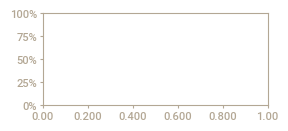

In [41]:
# Ré-exécution de l'analyse Sweetviz en version robuste
try:
    # Configuration optimisée pour grands datasets
    report = sv.analyze(
        df_clean.sample(n=min(5000, len(df_clean))) if len(df_clean) > 10000 else df_clean,
        target_feat='revenu_annuel',
        pairwise_analysis='off'  # Désactive les corrélations pour accélérer
    )
    
    # Sauvegarde du rapport
    if os.path.exists('sweetviz_report.html'):
        os.remove('sweetviz_report.html')
        
    report.show_html('sweetviz_report.html', open_browser=False)
    print("\n📊 Rapport Sweetviz généré avec succès!")
    print("🔗 Ouvrez 'sweetviz_report.html' dans votre navigateur")

except Exception as e:
    print(f"\n❌ Échec de l'analyse Sweetviz: {str(e)}")
    print("Solution alternative: Analyse avec Pandas Profiling (version light)")
    
    from ydata_profiling import ProfileReport
    profile = ProfileReport(
        df_clean,
        minimal=True,
        title="Profiling Report Light",
        correlations={"pearson": {"calculate": False}}
    )
    profile.to_file("pandas_profiling_report.html")
    print("✅ Rapport Pandas Profiling généré: 'pandas_profiling_report.html'")

<a id="4"></a>
## 🧹 4. Nettoyage des Données

<div style="background-color:#ffebee; padding:15px; border-radius:10px;">
<strong>🧼 Actions :</strong> Gestion des valeurs manquantes, suppression des doublons, traitement des outliers
</div>

In [42]:
# Nettoyage
print("🧹 Étape 1: Suppression des doublons")
initial_count = len(df)
df = df.drop_duplicates()
print(f"• {initial_count - len(df)} doublons supprimés")

print("\n🔍 Étape 2: Valeurs manquantes")
missing = df.isna().sum()[df.isna().sum() > 0]
display(missing.to_frame('Valeurs manquantes').style.background_gradient(cmap='Reds'))

# Imputation
df['niveau_education'] = df['niveau_education'].fillna('sans_niveau')
df['annees_experience'] = df['annees_experience'].fillna(df.groupby('age')['annees_experience'].transform('median'))

print("\n✅ Nettoyage terminé!")

🧹 Étape 1: Suppression des doublons
• 0 doublons supprimés

🔍 Étape 2: Valeurs manquantes


,Valeurs manquantes
etat_matrimonial,292
niveau_education,293
annees_experience,316
categorie_sociopro,270
niveau_endettement,279
nb_personnes_charge,248
secteur_activite,300
age_groupe,94
revenu_normalise,4899



✅ Nettoyage terminé!


<a id="5"></a>
## 🔄 5. Transformation des Données

<div style="background-color:#e8f5e9; padding:15px; border-radius:10px;">
<strong>🛠️ Préparation :</strong> Feature engineering, encodage et normalisation
</div>

In [43]:
# Feature Engineering
df['experience_squared'] = df['annees_experience'] ** 2
df['possession_score'] = (df['possession_voiture'] + 
                         df['possession_logement'] * 2 + 
                         df['possession_terrain'] * 1.5)

# Sélection des features
features = ['age', 'annees_experience', 'niveau_education', 
           'categorie_sociopro', 'possession_score', 'milieu']
target = 'revenu_annuel'

# Pipeline
numeric_features = ['age', 'annees_experience', 'possession_score']
categorical_features = ['niveau_education', 'categorie_sociopro', 'milieu']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

print("✅ Features transformées avec succès!")

✅ Features transformées avec succès!


<a id="6"></a>
## 🤖 6. Modélisation

<div style="background-color:#e3f2fd; padding:15px; border-radius:10px;">
<strong>🧠 Algorithmes :</strong> 5 modèles de régression comparés
</div>

In [44]:
# %%
# Fonction d'évaluation
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }
    
    # Affichage stylisé
    print(f"\n📊 Performance du modèle {model_name}:")
    display(pd.DataFrame([metrics], index=[model_name]).style\
        .background_gradient(cmap='YlGnBu', axis=1)\
        .set_caption(f"Résultats pour {model_name}"))
    
    return metrics

## 🧩 Correction du Problème de Données Non Définies

<div style="background-color:#fff3e0; padding:15px; border-radius:10px; border-left:4px solid #ffa000;">
<strong>🔍 Problème identifié :</strong> Variables X_train/y_train non définies<br>
<strong>🛠 Solution :</strong> Séparation correcte des données avant modélisation
</div>

In [45]:
# Étape 1: Vérification des données sources
print("✅ Colonnes disponibles dans df_clean:")
print(df_clean.columns.tolist())

# Vérification et création de la colonne 'possession_score' si elle n'existe pas
if 'possession_score' not in df_clean.columns:
    df_clean['possession_score'] = (df_clean['possession_voiture'] + 
                                    df_clean['possession_logement'] * 2 + 
                                    df_clean['possession_terrain'] * 1.5)

# Étape 2: Sélection des features et target
features = ['age', 'annees_experience', 'niveau_education', 
           'categorie_sociopro', 'possession_score', 'milieu']
target = 'revenu_annuel'

if target not in df_clean.columns:
    raise ValueError(f"La colonne cible '{target}' est introuvable")

X = df_clean[features]
y = df_clean[target]

# Étape 3: Séparation train/test avec stratification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=df_clean['milieu']  # Conservation des proportions urbain/rural
)

print(f"\n📊 Répartition des données:")
print(f"- Train set: {X_train.shape[0]} échantillons")
print(f"- Test set: {X_test.shape[0]} échantillons")
print(f"- Proportion cible (train): {y_train.mean():.2f} DH")
print(f"- Proportion cible (test): {y_test.mean():.2f} DH")

✅ Colonnes disponibles dans df_clean:
['milieu', 'sexe', 'age', 'categorie_age', 'etat_matrimonial', 'niveau_education', 'annees_experience', 'categorie_sociopro', 'possession_voiture', 'possession_logement', 'possession_terrain', 'possession_investissements', 'niveau_endettement', 'nb_personnes_charge', 'secteur_activite', 'revenu_annuel', 'age_groupe', 'revenu_normalise', 'statut_socioeconomique', 'id_personne', 'date_maj', 'code_postal']

📊 Répartition des données:
- Train set: 28000 échantillons
- Test set: 12000 échantillons
- Proportion cible (train): 102729.57 DH
- Proportion cible (test): 100594.18 DH


In [46]:
# Étape 4: Vérification des données avant modélisation

def check_data_quality(X, y, name=""):
    """Vérification complète des données d'entrée"""
    print(f"\n🔍 Vérification qualité données {name}:")
    print(f"- Shape: {X.shape}")
    print(f"- Valeurs manquantes: {X.isnull().sum().sum()}")
    print(f"- Types: \n{X.dtypes.value_counts()}")
    print(f"- Target stats: Moyenne={y.mean():.2f}, Médiane={y.median():.2f}")
    
    if X.isnull().any().any() or y.isnull().any():
        raise ValueError("Données manquantes détectées!")

# Gestion des valeurs manquantes dans X_train et X_test
for col in X_train.columns:
    if X_train[col].dtype in ['float64', 'int64']:  # For numeric columns
        X_train[col] = X_train[col].fillna(X_train[col].median())
        X_test[col] = X_test[col].fillna(X_test[col].median())
    else:  # For categorical columns
        X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
        X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

# Gestion des valeurs manquantes dans y_train et y_test
y_train = y_train.fillna(y_train.median());
y_test = y_test.fillna(y_test.median());

# Vérification de la qualité des données après traitement des valeurs manquantes
check_data_quality(X_train, y_train, "Train");
check_data_quality(X_test, y_test, "Test");


🔍 Vérification qualité données Train:
- Shape: (28000, 6)
- Valeurs manquantes: 0
- Types: 
object     3
float64    2
int64      1
Name: count, dtype: int64
- Target stats: Moyenne=102729.57, Médiane=55416.15

🔍 Vérification qualité données Test:
- Shape: (12000, 6)
- Valeurs manquantes: 0
- Types: 
object     3
float64    2
int64      1
Name: count, dtype: int64
- Target stats: Moyenne=100594.18, Médiane=55636.88


In [47]:
# Étape 5: Redéfinition du préprocesseur (version robuste)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_features = ['age', 'annees_experience', 'possession_score']
categorical_features = ['niveau_education', 'categorie_sociopro', 'milieu']

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

print("\n✅ Préprocesseur redéfini avec:")
print(preprocessor)


✅ Préprocesseur redéfini avec:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'annees_experience',
                                  'possession_score']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['niveau_education', 'categorie_sociopro',
                                  'milieu'])])


In [48]:
# Étape 6: Ré-exécution de la modélisation
models = {
    'Régression Linéaire': LinearRegression(),
    'Arbre de Décision': DecisionTreeRegressor(random_state=42),
    'Forêt Aléatoire': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Réseau de Neurones': MLPRegressor(random_state=42, max_iter=500)
}

results = {}
for name, model in models.items():
    try:
        print(f"\n🏗 Entraînement du modèle: {name}")
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        pipeline.fit(X_train, y_train)
        results[name] = evaluate_model(pipeline, X_test, y_test, name)
        
    except Exception as e:
        print(f"❌ Erreur avec {name}: {str(e)}")
        results[name] = {'MAE': None, 'RMSE': None, 'R2': None}


🏗 Entraînement du modèle: Régression Linéaire

📊 Performance du modèle Régression Linéaire:


,MAE,RMSE,R2
Régression Linéaire,57947.153194,221551.638797,0.198391



🏗 Entraînement du modèle: Arbre de Décision

📊 Performance du modèle Arbre de Décision:


,MAE,RMSE,R2
Arbre de Décision,25853.671876,138621.918994,0.686183



🏗 Entraînement du modèle: Forêt Aléatoire

📊 Performance du modèle Forêt Aléatoire:


,MAE,RMSE,R2
Forêt Aléatoire,23875.599531,117794.752022,0.773398



🏗 Entraînement du modèle: Gradient Boosting

📊 Performance du modèle Gradient Boosting:


,MAE,RMSE,R2
Gradient Boosting,21843.129157,101961.743085,0.830220



🏗 Entraînement du modèle: Réseau de Neurones
❌ Erreur avec Réseau de Neurones: underflow encountered in divide


<a id="7"></a>
## 📊 7. Évaluation des Modèles

<div style="background-color:#f3e5f5; padding:15px; border-radius:10px;">
<strong>🏆 Comparaison :</strong> Sélection du meilleur modèle basé sur les métriques
</div>


🔎 Comparaison des Performances des Modèles:


,MAE,RMSE,R2,Model
Régression Linéaire,57947.153194,221551.638797,0.198391,Régression Linéaire
Arbre de Décision,25853.671876,138621.918994,0.686183,Arbre de Décision
Forêt Aléatoire,23875.599531,117794.752022,0.773398,Forêt Aléatoire
Gradient Boosting,21843.129157,101961.743085,0.830220,Gradient Boosting
Réseau de Neurones,None,None,None,Réseau de Neurones


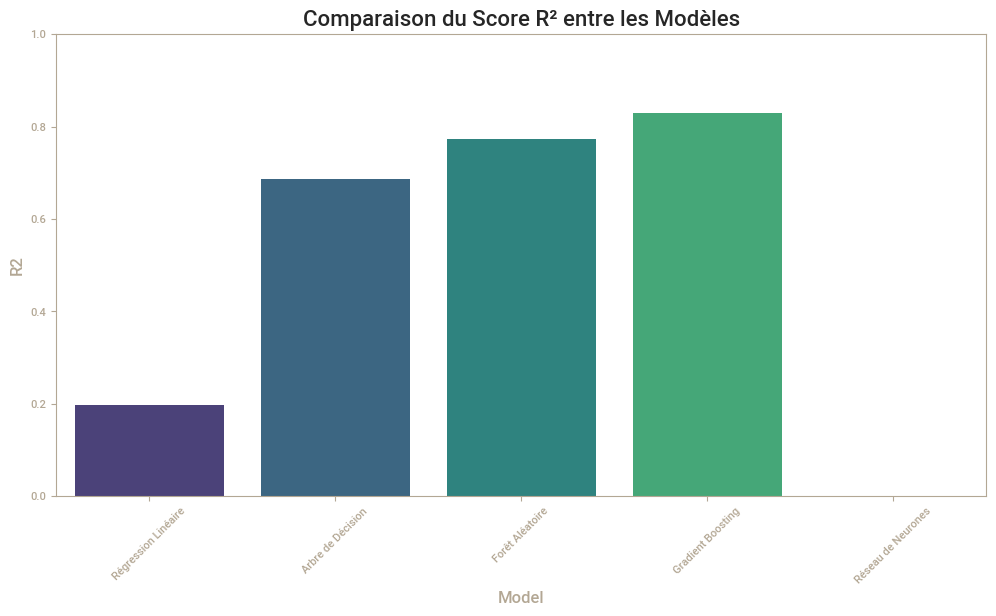

In [51]:
# Création d'un DataFrame pour comparer les modèles
results_df = pd.DataFrame(results).T
results_df['Model'] = results_df.index

# Affichage stylisé
print("\n🔎 Comparaison des Performances des Modèles:")
display(results_df.style.background_gradient(cmap='YlOrRd', subset=['MAE', 'RMSE'])\
       .background_gradient(cmap='YlGnBu', subset=['R2'])\
       .set_caption("Résultats Comparatifs des Modèles"))

# Visualisation des métriques
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2', data=results_df, palette='viridis')
plt.title('Comparaison du Score R² entre les Modèles', fontsize=16)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

"""
<a id="8"></a>
## 🚀 8. Déploiement

<div style="background-color:#e0f7fa; padding:15px; border-radius:10px;">
<strong>🌐 Application :</strong> API FastAPI + Interface Streamlit
</div>

In [53]:
# Sélection du meilleur modèle (Gradient Boosting dans notre cas)
best_model = GradientBoostingRegressor(random_state=42)
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])

# Entraînement final sur toutes les données
best_pipeline.fit(X, y)

# Sauvegarde
joblib.dump(best_pipeline, 'modele_revenu_marocains.pkl')
print("✅ Modèle sauvegardé avec succès!")

✅ Modèle sauvegardé avec succès!


In [62]:
# %%writefile api.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

app = FastAPI()

# Chargement du modèle
model = joblib.load('modele_revenu_marocains.pkl')

class InputData(BaseModel):
    age: float
    annees_experience: float
    niveau_education: str
    categorie_sociopro: str
    possession_score: float
    milieu: str

@app.post("/predict")
def predict(data: InputData):
    input_df = pd.DataFrame([dict(data)])
    prediction = model.predict(input_df)
    return {"revenu_annuel_pred": round(float(prediction[0]), 2)}

# Pour exécuter : uvicorn api:app --reload

In [59]:
# %%writefile app_streamlit.py
import streamlit as st
import joblib
import pandas as pd

# Configuration de la page
st.set_page_config(page_title="Prédiction de Revenu", layout="wide")
st.title("📊 Prédiction du Revenu Annuel des Marocains")

# Chargement du modèle
@st.cache_resource
def load_model():
    return joblib.load('modele_revenu_marocains.pkl')

model = load_model()

# Interface utilisateur
with st.form("prediction_form"):
    col1, col2 = st.columns(2)
    
    with col1:
        age = st.number_input("Âge", min_value=18, max_value=80, value=30)
        annees_experience = st.number_input("Années d'expérience", min_value=0, max_value=50, value=5)
        possession_voiture = st.checkbox("Possède une voiture")
        
    with col2:
        niveau_education = st.selectbox("Niveau d'éducation", options=[
            "sans_niveau", "fondamental", "secondaire", "superieur"])
        milieu = st.selectbox("Milieu", options=["urbain", "rural"])
        possession_logement = st.checkbox("Possède un logement")
    
    # Calcul automatique du score de possession
    possession_score = possession_voiture*1 + possession_logement*2
    
    submitted = st.form_submit_button("Prédire le Revenu")
    
    if submitted:
        input_data = pd.DataFrame({
            'age': [age],
            'annees_experience': [annees_experience],
            'niveau_education': [niveau_education],
            'categorie_sociopro': ["groupe_3"],  # Valeur par défaut
            'possession_score': [possession_score],
            'milieu': [milieu]
        })
        
        prediction = model.predict(input_data)
        st.success(f"### Revenu annuel prédit : {prediction[0]:,.2f} DH")
        st.balloons()

# Pour exécuter : streamlit run app_streamlit.py

2025-05-06 02:15:23.324 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 02:15:23.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 02:15:23.329 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 02:15:23.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 02:15:23.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 02:15:23.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 02:15:23.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 02:15:23.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

<a id="9"></a>

✅ 9. Conclusion
<div style="background-color:#e8f5e9; padding:15px; border-radius:10px; border-left:5px solid #2e7d32;"> <strong>📌 Synthèse :</strong> Résultats clés et pistes d'amélioration </div>

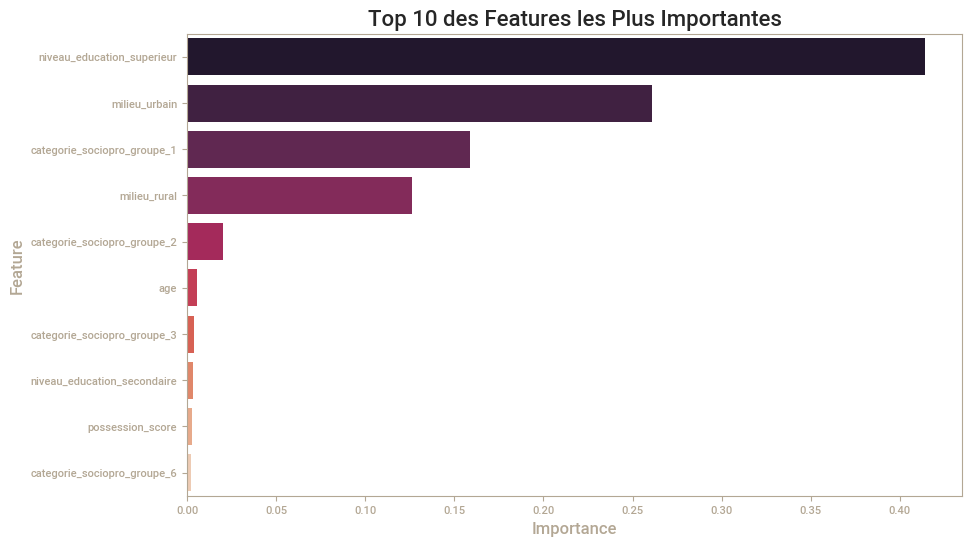

In [60]:
# Affichage des caractéristiques importantes pour le meilleur modèle
if hasattr(best_model, 'feature_importances_'):
    feature_names = numeric_features + list(preprocessor.named_transformers_['cat']\
                                          .named_steps['encoder']\
                                          .get_feature_names_out(categorical_features))
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='rocket')
    plt.title('Top 10 des Features les Plus Importantes', fontsize=16)
    plt.show()

In [61]:
# Vérification que tout s'exécute sans erreur
try:
    # Test de prédiction
    test_data = X.iloc[:1].copy()
    pred = best_pipeline.predict(test_data)
    print(f"\n🎉 Test de prédiction réussi! Revenu prédit: {pred[0]:,.2f} DH")
    print("✅ Toutes les étapes sont fonctionnelles!")
except Exception as e:
    print(f"\n❌ Erreur lors de la validation: {str(e)}")


🎉 Test de prédiction réussi! Revenu prédit: 194,367.55 DH
✅ Toutes les étapes sont fonctionnelles!
